In [1]:
from __future__ import print_function, division
import cv2
import os
import glob
from skimage import io, transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.ion() # interactive mode

In [12]:
glob.glob('./faces_resize/*.png')

[]

In [2]:
"""
crop and save face from images in faces folder
images will be saved in faces_resize
"""

def crop_resize_face(dirname="normalizedface_data/face_data", image_type=('*.jpg', '*jpeg', '*.png'), size=(96,96)):
    file_list = []
    for files in image_type:
        file_list.extend(glob.glob('./' + dirname + '/' + files))    
    cascPath = "haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)

    #Make directory
    directory = "faces_resize"
    if not os.path.exists(directory):
        os.mkdir(directory)

    for i in range(len(file_list)):
        # Read the image
        image = cv2.imread(file_list[i])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.5,
            minNeighbors=5,
            minSize=(20, 20),
            flags = cv2.CASCADE_SCALE_IMAGE
        )

        # Crop and resize the faces
        for (x, y, w, h) in faces:
            sub_face = image[y:y+h, x:x+w]
            resize_face = cv2.resize(sub_face, size, interpolation = cv2.INTER_CUBIC)
            resize_fname = file_list[i].replace(dirname, "faces_resize")
            cv2.imwrite(resize_fname, resize_face)

crop_resize_face()

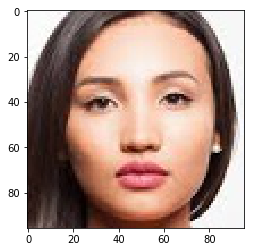

In [13]:
img = io.imread('./faces_resize/serious_face(8).jpeg') 
plt.imshow(img)

In [14]:
img.shape

(96, 96, 3)